In [1]:
import pandas as pd
from pandas import DataFrame

df = pd.read_excel("../data/619702-XLS-ENG.xlsx", "Switchbacks")
df

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,2018-02-19 07:00:00,2 mins,False,True,1415,3245,256,34458.411634,3372,1476
1,Boston,2018-02-19 09:40:00,5 mins,True,False,1461,2363,203,29764.349821,2288,1275
2,Boston,2018-02-19 12:20:00,2 mins,False,False,1362,2184,118,27437.367363,2283,962
3,Boston,2018-02-19 15:00:00,5 mins,True,True,1984,3584,355,44995.452993,4035,2021
4,Boston,2018-02-19 17:40:00,2 mins,False,False,1371,2580,181,27583.955295,2200,979
...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,2018-03-04 17:40:00,5 mins,True,False,1718,2655,173,28288.521151,2600,1361
122,Boston,2018-03-04 20:20:00,2 mins,False,False,1303,2334,158,27072.606354,2164,940
123,Boston,2018-03-04 23:00:00,5 mins,True,False,1157,2359,154,23525.115952,2323,1473
124,Boston,2018-03-05 01:40:00,2 mins,False,False,1170,2240,131,23005.270271,2257,900


In [2]:
df.columns

Index(['city_id', 'period_start', 'wait_time', 'treat', 'commute',
       'trips_pool', 'trips_express', 'rider_cancellations',
       'total_driver_payout', 'total_matches', 'total_double_matches'],
      dtype='object')

In [3]:
df_groups = df.groupby("wait_time")
df_groups.mean()

,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
wait_time,,,,,,,,
2 mins,0.0,0.15873,1355.317460,2611.666667,165.349206,29291.238922,2633.206349,1287.158730
5 mins,1.0,0.15873,1460.698413,2419.380952,190.126984,27183.202390,2438.301587,1357.730159


[244445, 249920]

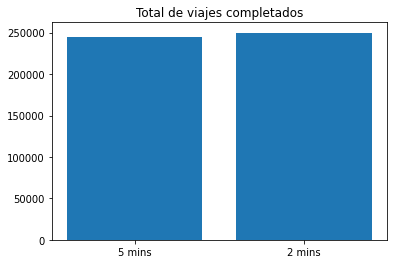

In [23]:
import matplotlib.pyplot as plt

two_mins_df = df_groups.get_group("2 mins")
five_mins_df = df_groups.get_group("5 mins")
fm_total_c_trips = five_mins_df["trips_pool"].sum() + five_mins_df["trips_express"].sum()
tm_total_c_trips = two_mins_df["trips_pool"].sum() + two_mins_df["trips_express"].sum()
heights = [fm_total_c_trips, tm_total_c_trips]
display(heights)
plt.bar(height=heights, x=["5 mins", "2 mins"])
plt.title("Total de viajes completados")
plt.show()


[95.32881215803575, 95.99864790636751]

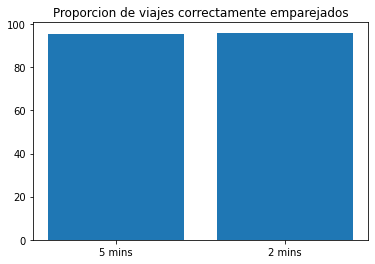

In [25]:
def get_percentage_completed_trips(df):
    completed_trips = df["trips_pool"].sum() + df["trips_express"].sum()
    total_trips = completed_trips + df["rider_cancellations"].sum()
    return completed_trips*100/total_trips

heights = [get_percentage_completed_trips(five_mins_df), get_percentage_completed_trips(two_mins_df)]
display(heights)
plt.bar(height=heights, x=["5 mins", "2 mins"])
plt.title("Proporcion de viajes correctamente emparejados")
plt.show()


five_mins    1.712542e+06
two_mins     1.845348e+06
dtype: float64

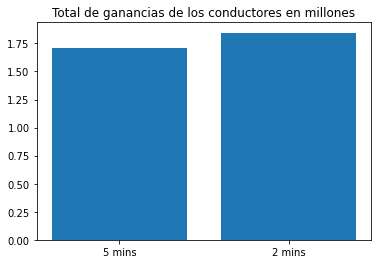

In [6]:
frame = {
    "five_mins": (five_mins_df["total_driver_payout"]).values,
    "two_mins": (two_mins_df["total_driver_payout"]).values
}
total_trips = DataFrame(frame).sum()
total_trips
display(total_trips)
fig, ax = plt.subplots()
ax.bar(height=total_trips.values/1000000, x=["5 mins", "2 mins"])
plt.title("Total de ganancias de los conductores en millones")
plt.show()